<a href="https://colab.research.google.com/github/mathe209/smoker_competition/blob/main/smoke_competiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('train_smoke_comp.csv')

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,38640.0,19319.500000,11154.551537,0.0,9659.75,19319.5,28979.25,38639.0
age,38640.0,44.402484,11.799259,20.0,40.00,40.0,55.00,85.0
height(cm),38640.0,165.258696,8.846222,135.0,160.00,165.0,170.00,190.0
weight(kg),38640.0,67.199793,12.647320,30.0,60.00,65.0,75.00,130.0
waist(cm),38640.0,83.081131,8.988257,51.0,77.00,83.0,89.00,127.0
eyesight(left),38640.0,1.004889,0.406917,0.1,0.80,1.0,1.20,9.9
eyesight(right),38640.0,0.998615,0.387964,0.1,0.80,1.0,1.20,9.9
hearing(left),38640.0,1.024353,0.154145,1.0,1.00,1.0,1.00,2.0
hearing(right),38640.0,1.024482,0.154543,1.0,1.00,1.0,1.00,2.0
systolic,38640.0,122.527640,12.706683,81.0,114.00,121.0,130.00,203.0


Text(0.5, 1.0, 'counts')

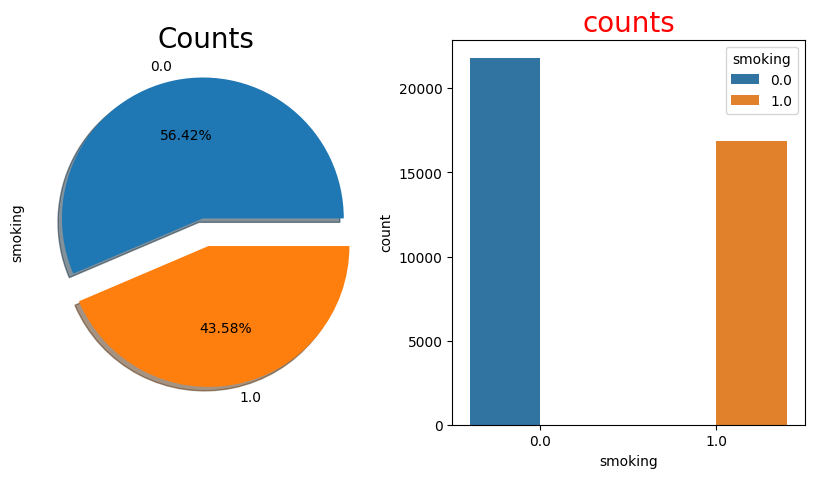

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
ax = data.smoking.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True)
ax.set_title('Counts',size=20)

ax = plt.subplot(1,2,2)
ax = sns.countplot(x='smoking',data=data,hue='smoking')
ax.set_title('counts',color='red',size=20)

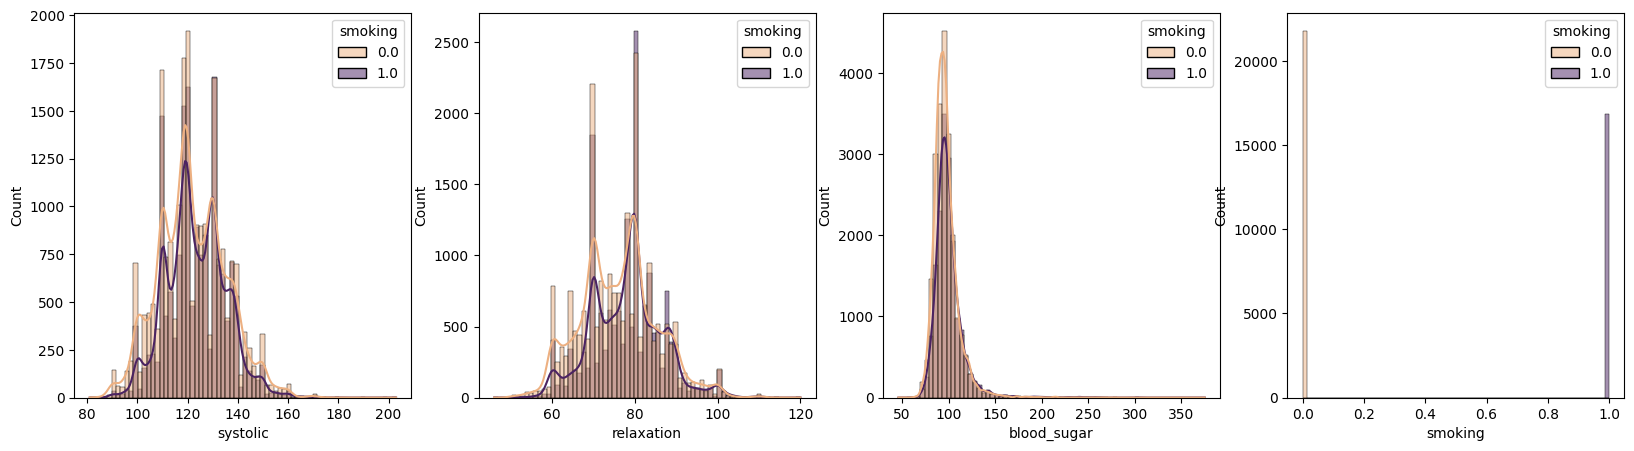

In [ ]:


sugar_data = pd.DataFrame(data={
    'systolic':data['systolic'],
    'relaxation':data['relaxation'],
    'blood_sugar':data['fasting blood sugar'],
    'smoking':data['smoking']
})
num_cols = len(sugar_data.columns)

plt.figure(figsize=(5 * num_cols, 5))
for i, col in enumerate(sugar_data.columns):

    plt.subplot(1,num_cols,i+1)
    sns.histplot(x=col,data=sugar_data,hue='smoking',kde=True,bins=70,palette='flare')

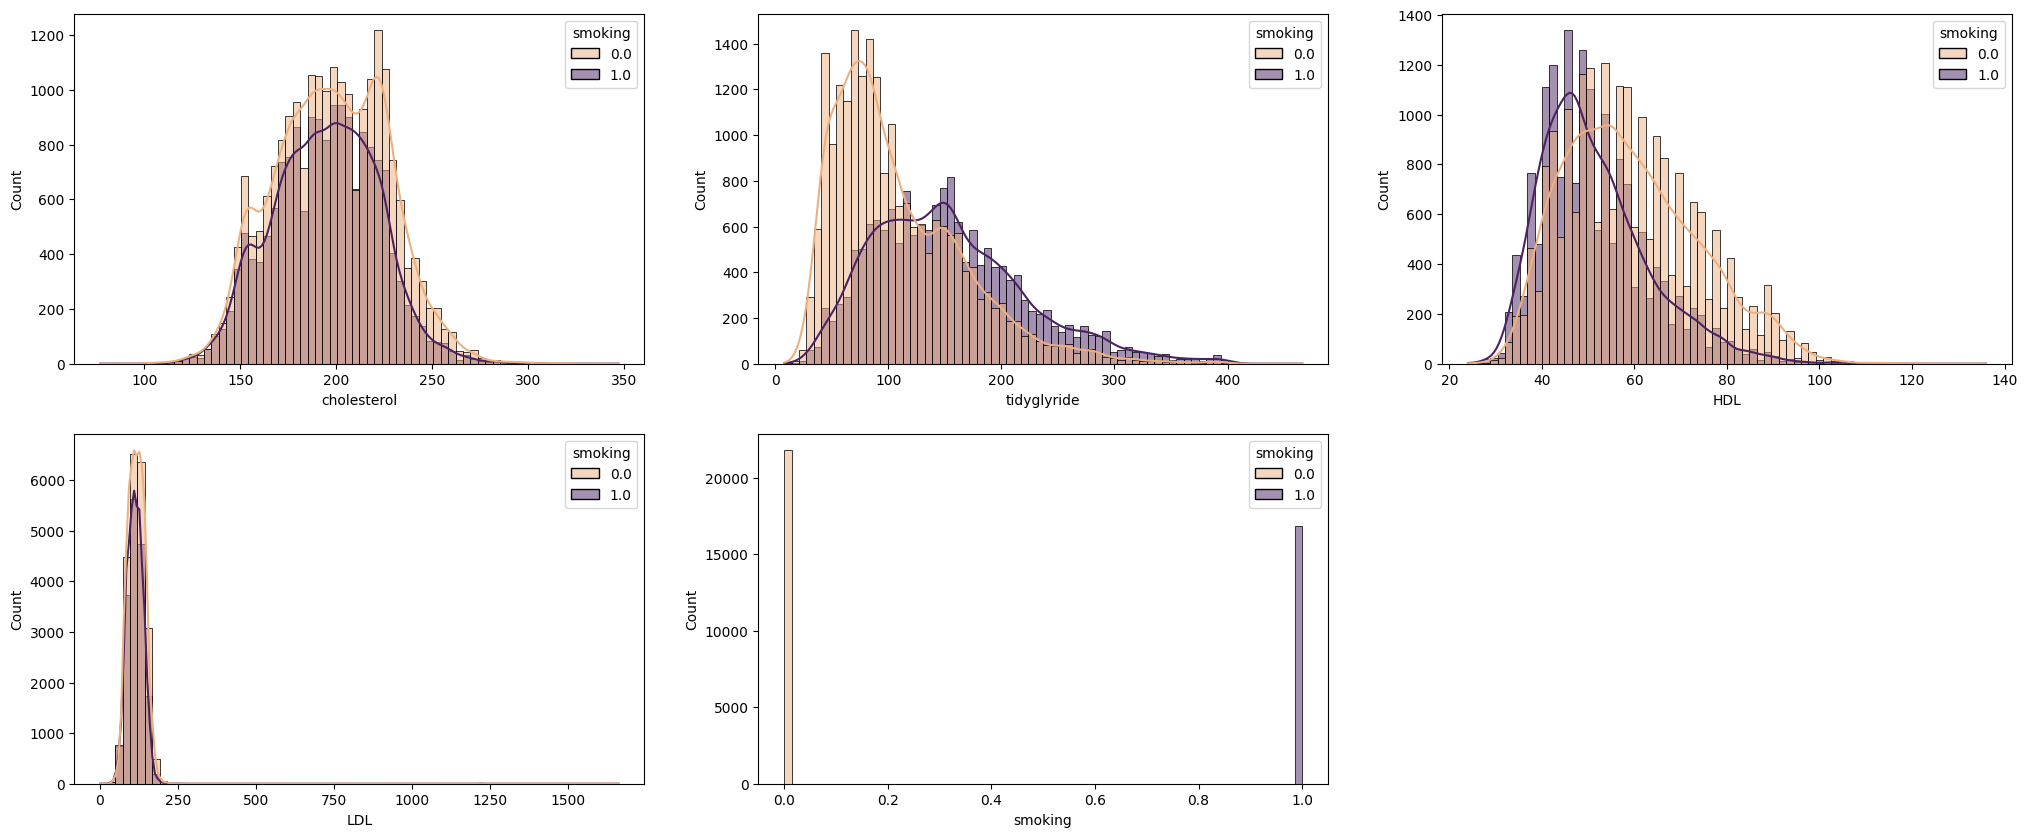

In [ ]:
"""
hdl is good when is high,
LDL is not good when high
"""
cholesterol_data = pd.DataFrame(data={
    'cholesterol':data['Cholesterol'],
    'tidyglyride':data['triglyceride'],
    'HDL':data['HDL'],
    'LDL':data['LDL'],
    'smoking':data['smoking']
})

num_cols = len(cholesterol_data.columns)

plt.figure(figsize=(5 * num_cols, 10))
for i, col in enumerate(cholesterol_data.columns):

    plt.subplot(2,3,i+1)
    sns.histplot(x=col,data=cholesterol_data,hue='smoking',kde=True,bins=70,palette='flare')


<ipython-input-80-7275e92828d0>:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=col,data=liver_data,hue='smoking',palette='flare')


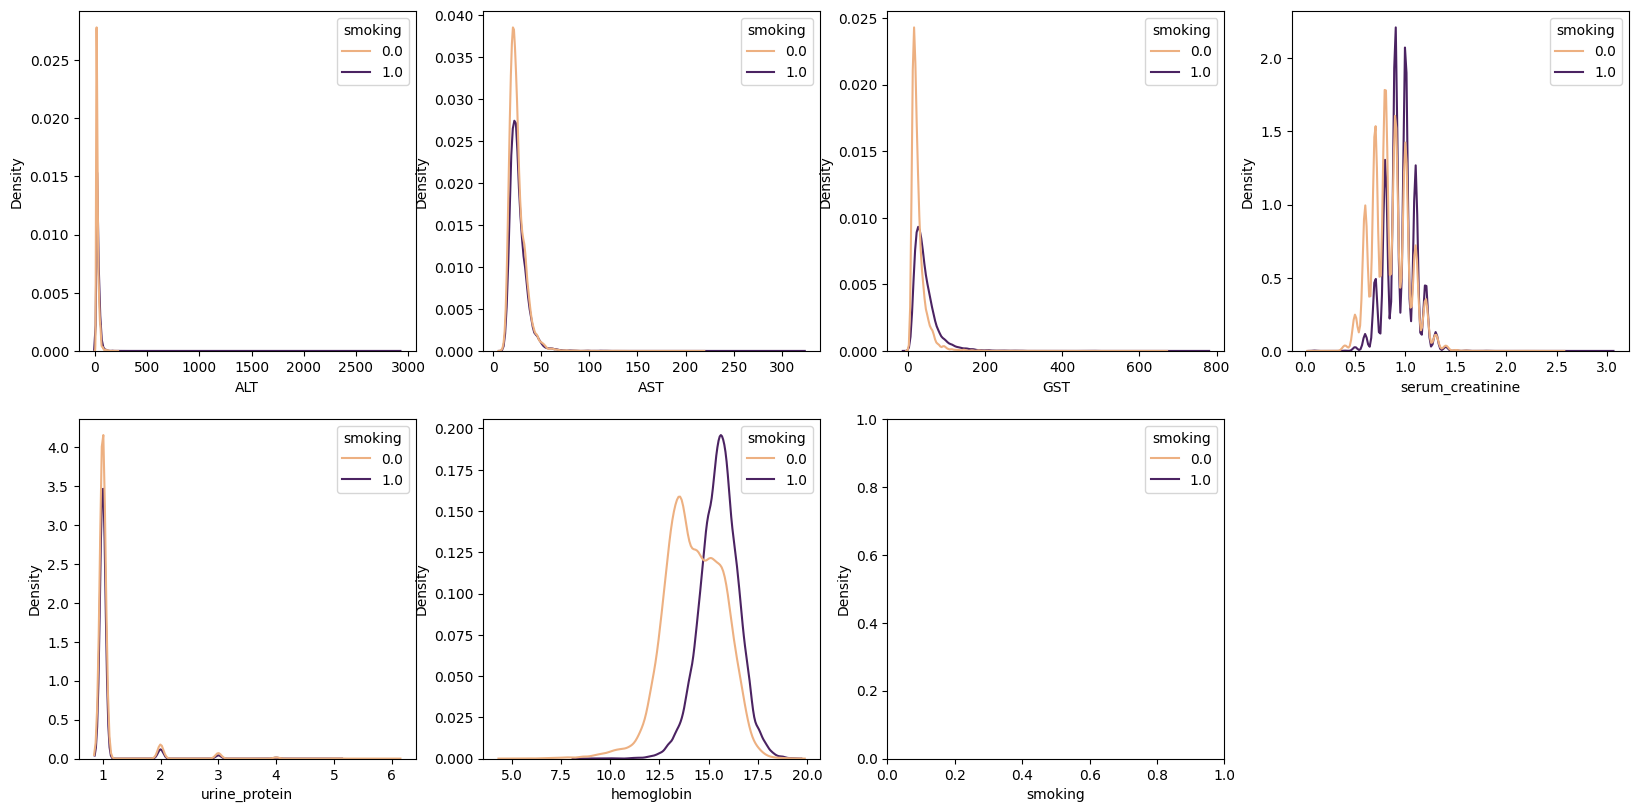

In [ ]:
"""
alt, ast and gpt for liver disease
serum creatinine,urine protein for kidney disease
"""
liver_data = pd.DataFrame(data={
    'ALT':data['ALT'],
    'AST':data['AST'],
    'GST':data['Gtp'],
    'serum_creatinine':data['serum creatinine'],
    'urine_protein':data['Urine protein'],
    'hemoglobin':data['hemoglobin'],
    'smoking':data['smoking']
})


num_cols = len(liver_data.columns)

plt.figure(figsize=(20, 15))
for i, col in enumerate(liver_data.columns):

    plt.subplot(3,4,i+1)
    sns.kdeplot(x=col,data=liver_data,hue='smoking',palette='flare')

In [ ]:
#checking for relationships
sugar_data.head()

,systolic,relaxation,blood_sugar,smoking
0,135,87,94,1.0
1,146,83,147,0.0
2,118,75,79,1.0
3,131,88,91,0.0
4,121,76,91,1.0


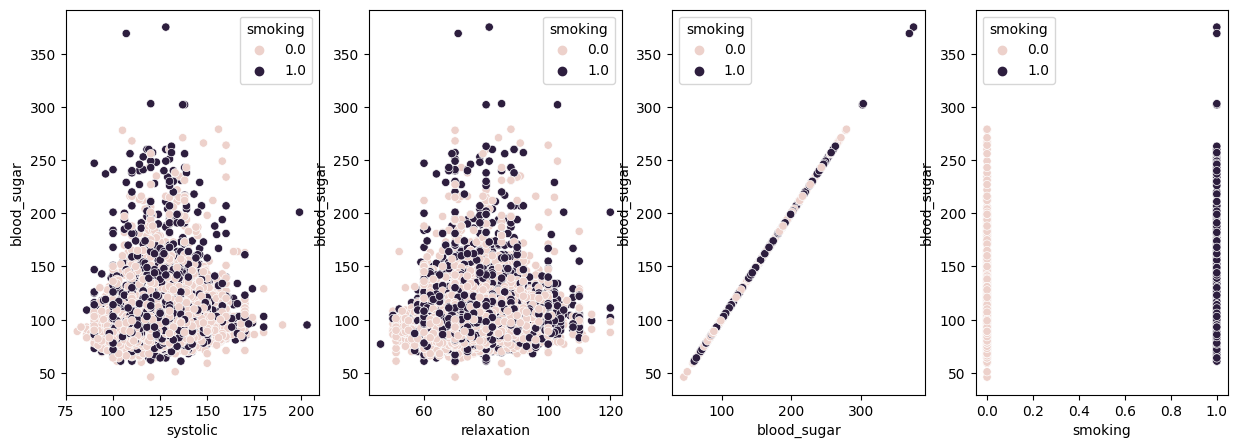

In [ ]:
plt.figure(figsize=(15,5))
for i,col in enumerate(sugar_data.columns):
  plt.subplot(1,4,i+1)
  sns.scatterplot(x=col, y='blood_sugar',data=sugar_data, hue='smoking')
plt.show()

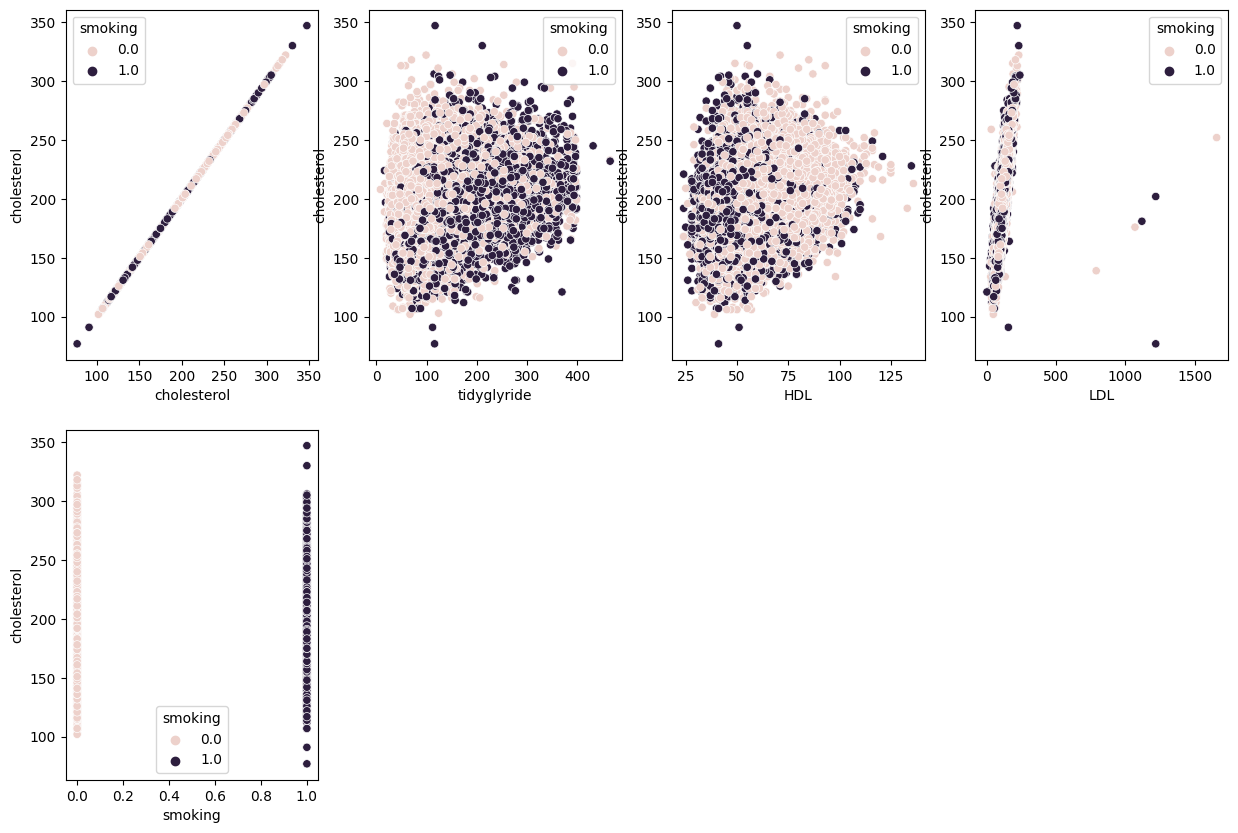

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(cholesterol_data.columns):
  plt.subplot(2,4,i+1)
  sns.scatterplot(x=col, y='cholesterol',data=cholesterol_data, hue='smoking')
plt.show()